# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [33]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[-6. 11. -6.  1.]
Wektor współczynników w kolejności rosnących potęg (a0, a1, ..., a20):
[ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]

Największa wartość bezwzględna współczynnika (dla x^19): 1.3803759753640704e+19


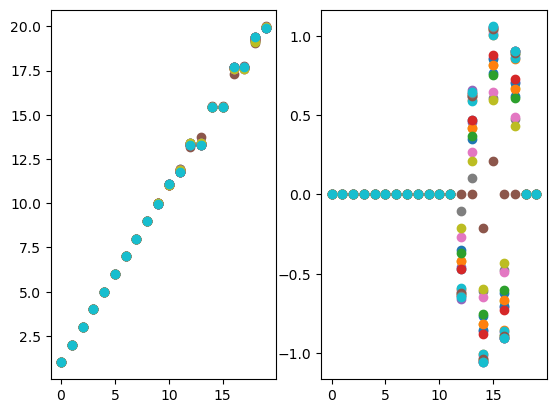

In [11]:
# ===== Twoja implementacja tutaj =====
import matplotlib.pyplot as plt
roots = [1,2,3]
coef=nppoly.polyfromroots(roots)
print(coef)

def roots_20(coef: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(coef, np.ndarray) or coef.ndim != 1:
        return None

    coef_zaburzony = coef + np.random.random_sample(coef.shape)*1e-10
    

    pierwiastki = nppoly.polyroots(coef_zaburzony)
  
    return coef_zaburzony, pierwiastki

roots_tab=[(i for i in range (1,20))]


roots_2 = np.arange(1, 21)
a2_c = nppoly.polyfromroots(roots_2)
a2_a=a2_c[::-1]
print("Wektor współczynników w kolejności rosnących potęg (a0, a1, ..., a20):")
print(a2_c)
print("\nNajwiększa wartość bezwzględna współczynnika (dla x^19):", np.max(np.abs(a2_c)))

plt.figure()
xy = plt.subplot(1, 2, 1)
y = plt.subplot(1, 2, 2)
for i in range(0, 20):
    a, x = main.roots_20(a2_c)
    xy.plot( np.real(x), 'o')
    #xy.set_yscale("log")
    y.plot(np.imag(x), 'o')

---

3.Pierwiastki są bardziej narażone na zaburzenie im większe są. Jest to prawdziwe zarówno dla części rzeczywistej jak i urojonej.Najbardziej rzucającym się w oczy efektem na wykresie są kolosalne odchyły w części urojonej zauważalne dla większych wartości pierwiastkó. Można na tej podstawie wnioskować, że wielomian w2 jest źle uwarunkowany (drobne zaburzenie gwałtownie zmienia położenie pierwiastka na płaszczyźnie zespolonej).

4.Wrażliwość każdego z pierwiastków wielomianu na małe zaburzenia współczynników jest mierzona za pomocą współczynnika uwarunkowania pierwiastka:
spółczynnik ten ilościowo określa, jak bardzo względna zmiana pierwiastka $\frac{\Delta r_k}{r_k}$ jest większa od względnej zmiany wektora współczynników $\frac{||\Delta \mathbf{a}||}{||\mathbf{a}||}$. Jest on zdefiniowany wzorem:$$C_k = \frac{||\mathbf{a}||_{\infty}}{|r_k| \cdot |w_2'(r_k)|}$$
Gdzie $||\mathbf{a}||_{\infty}$ to norma nieskończoności wektora współczynników (maksymalna wartość bezwzględna współczynnika), $r_k$ jest wartością pierwiastka, a $w_2'(r_k)$ to wartość pierwszej pochodnej wielomianu $w_2(x)$ w tym pierwiastku. 


### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Pierwiastki wielomianu z macierzy Frobeniusa:
[1.01748261+0.00732488j 1.01748261-0.00732488j 1.00704099+0.01748199j
 1.00704099-0.01748199j 0.99267659+0.01719963j 0.99267659-0.01719963j
 0.9827998 +0.00704241j 0.9827998 -0.00704241j]
Rozkład Schura macierzy Frobeniusa:
[1.01803887 1.01276241 1.01276241 1.00000925 1.00000925 0.98723764
 0.98723764 0.98194253]
Pierwiastki wielomianu z funkcji numpy:
[0.98364305+0.j         0.9883941 -0.01155103j 0.9883941 +0.01155103j
 0.99994858-0.01641331j 0.99994858+0.01641331j 1.01160603-0.01165373j
 1.01160603+0.01165373j 1.01645952+0.j        ]


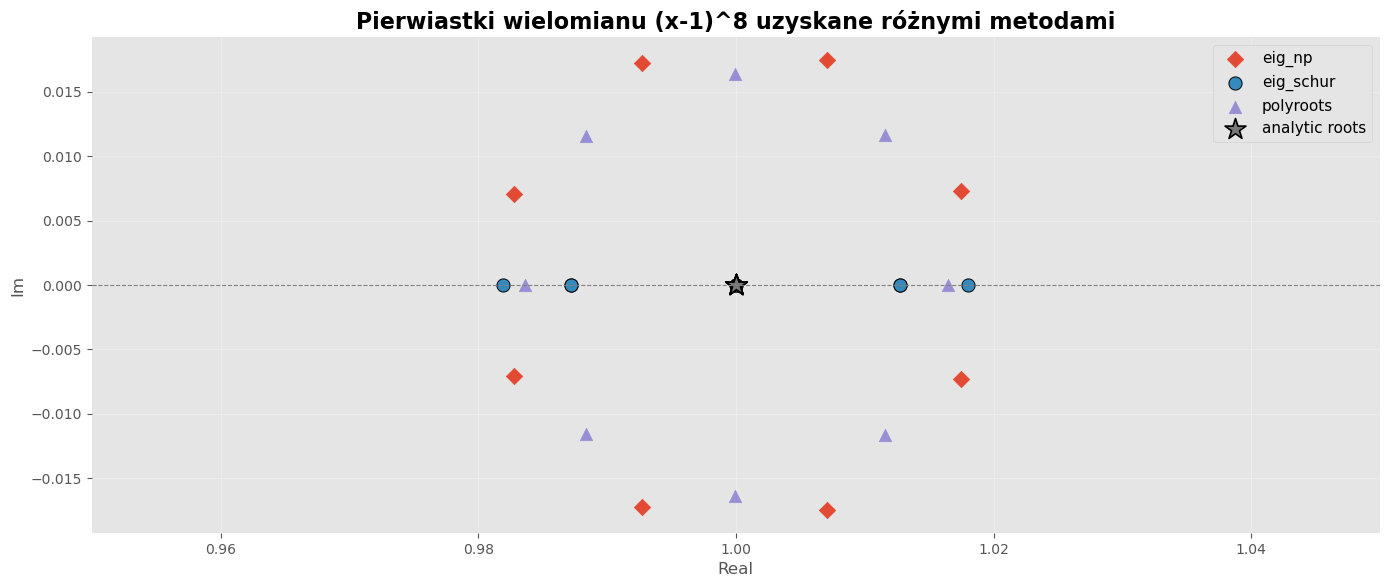

In [32]:
# ===== Twoja implementacja tutaj =====

def frob_a(coef: np.ndarray) -> np.ndarray | None:
    if not isinstance(coef, np.ndarray):
        return None
    
    if not coef.ndim == 1:
        return None
    
    if len(coef) < 2:
        return None
    
    A = np.eye(len(coef)-1, k=1)
    A[-1, :] = -coef[:-1] / coef[-1]
    return A
w3= frob_a(nppoly.polyfromroots([1, 1, 1, 1, 1 ,1 ,1, 1]))
print(w3)
eigenval=np.linalg.eigvals(w3)
print("Pierwiastki wielomianu z macierzy Frobeniusa:")
print(eigenval)

T, Z = sp.linalg.schur(w3)
print("Rozkład Schura macierzy Frobeniusa:")
print(np.diag(T))

roots_poly = nppoly.polyroots(nppoly.polyfromroots([1, 1, 1, 1, 1 ,1 ,1, 1]))
print("Pierwiastki wielomianu z funkcji numpy:")
print(roots_poly)

plt.figure(figsize=(14, 8))



ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)


plt.scatter(np.real(eigenval), np.imag(eigenval),
            marker='D', s=70, label='eig_np')
plt.scatter(np.real(np.diag(T)), np.imag(np.diag(T)),
            marker='o', s=90, edgecolor='black', linewidth=0.7, label='eig_schur')
plt.scatter(np.real(roots_poly), np.imag(roots_poly),
            marker='^', s=80, label='polyroots')
plt.scatter(np.real([1]*8), np.imag([1]*8),
            marker='*', s=250, linewidth=1.2, edgecolor='black', label='analytic roots')


plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')

plt.xlabel("Real", fontsize=12)
plt.ylabel("Im", fontsize=12)
plt.title("Pierwiastki wielomianu (x-1)^8 uzyskane różnymi metodami",
          fontsize=16, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fontsize=11)
plt.gca().set_aspect('equal', 'box')
plt.xlim([0.95, 1.05])

plt.tight_layout()
plt.show()




Wszystkie trzy metody dają wyniki obarczone błędem.
Wyznaczanie miejsc zerowych poprzez wartości własne macierzy Frobeniusa jest bardzo źle uwarunkowane — nawet dla prostego wielomianu z wielokrotnym pierwiastkiem rzeczywistym otrzymujemy głównie pierwiastki zespolone.
Metoda polyroots wypada najlepiej: daje dwa rzeczywiste pierwiastki i pozostałe leżą najbliżej prawdziwej wartości 1.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

[[  0.       1.       0.       0.       0.       0.       0.    ]
 [  0.       0.       1.       0.       0.       0.       0.    ]
 [  0.       0.       0.       1.       0.       0.       0.    ]
 [  0.       0.       0.       0.       1.       0.       0.    ]
 [  0.       0.       0.       0.       0.       1.       0.    ]
 [  0.       0.       0.       0.       0.       0.       1.    ]
 [-15.1875  30.375  -48.9375  61.875  -34.875    1.75     4.5   ]]
[-3.00000000e+00+0.00000000e+00j  3.00000000e+00+0.00000000e+00j
  1.50001773e+00+0.00000000e+00j  1.49999113e+00+1.53580332e-05j
  1.49999113e+00-1.53580332e-05j  1.73758401e-17+7.07106781e-01j
  1.73758401e-17-7.07106781e-01j]
[-3.00000000e+00  3.00000000e+00  1.50001177e+00  1.50001177e+00
  1.49997647e+00  5.89805982e-17  5.89805982e-17]
[-3.33333333e-01+0.00000000e+00j -6.33917339e-16-1.41421356e+00j
 -6.33917339e-16+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66664595e-01-3.58878382e-06j  6.66664595e-01+3.58878382e-06

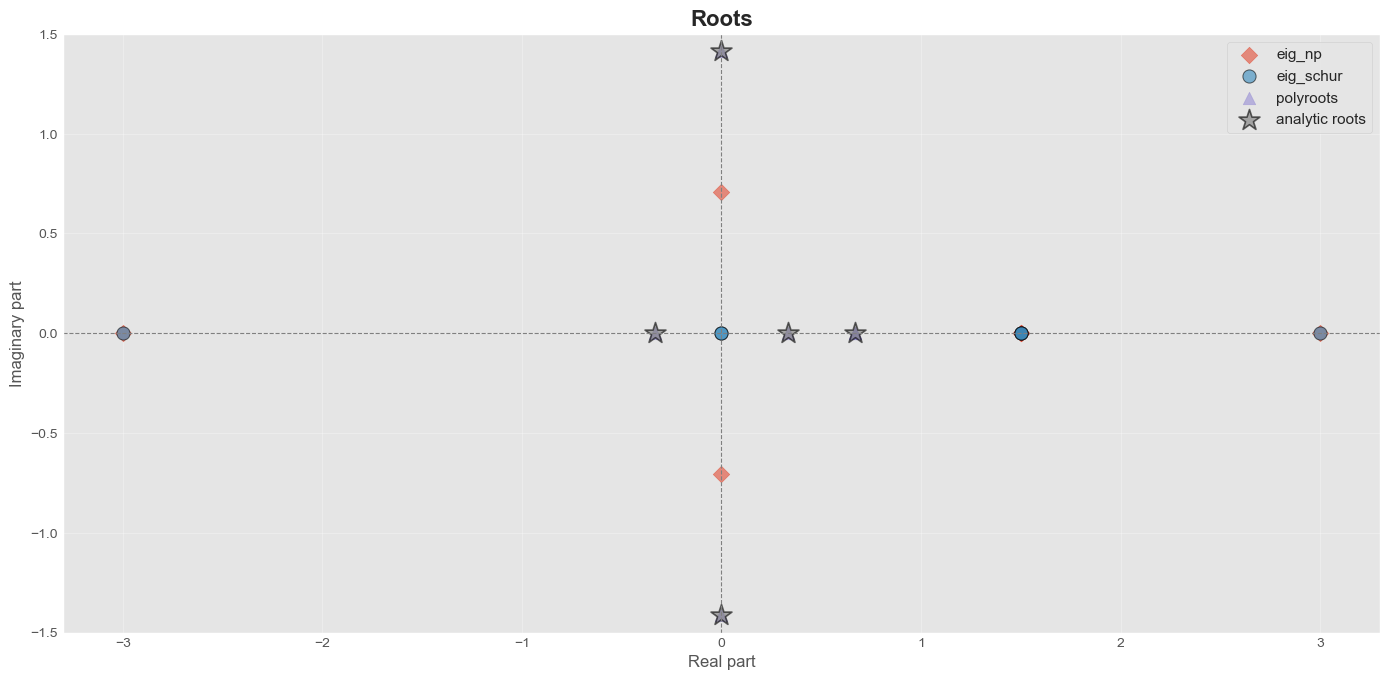

In [45]:
# ===== Twoja implementacja tutaj =====
polynomial = np.array([243, -486, 783, -990, 558, -28, -72, 16])
w4 = frob_a(polynomial)
print(w4)
eigenval = np.linalg.eigvals(w4)
print(eigenval)
T, Z = sp.linalg.schur(w4)
print(np.diag(T))
roots_poly = nppoly.polyroots(polynomial[::-1])
print(roots_poly)

plt.figure(figsize=(14, 8))

ax = plt.gca()


plt.scatter(np.real(eigenval), np.imag(eigenval),
            marker='D', s=70, alpha=0.6, label='eig_np')
plt.scatter(np.real(np.diag(T)), np.imag(np.diag(T)),
            marker='o', s=90, edgecolor='black', linewidth=0.7,
            alpha=0.6, label='eig_schur')
plt.scatter(np.real(roots_poly), np.imag(roots_poly),
            marker='^', s=80, alpha=0.6, label='polyroots')

plt.scatter(np.real([-1/3, 1/3, 2/3, 0, 0]),
            [0, 0, 0, -np.sqrt(2), np.sqrt(2)],
            marker='*', s=250, linewidth=1.2, edgecolor='black',
            alpha=0.6, label='analytic roots')


plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')

plt.xlabel("Real part", fontsize=12)
plt.ylabel("Imaginary part", fontsize=12)
plt.title("Roots", fontsize=16, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.legend(frameon=True, fontsize=11)

plt.gca().set_aspect('equal', 'box')
plt.ylim([-1.5, 1.5])

plt.tight_layout()
plt.show()


---

W tym przypadku zaproponowane metody przyniosły znacznie lepszy skutek. Pierwiastki zwrócone przez funkcję polyroots pokrywają się z prawdziwymi.

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [ ]:

def eig_err(num_vals, true_vals):
    num_sorted = np.sort(num_vals.real)
    true_sorted = np.sort(true_vals)

    m = min(len(num_sorted), len(true_sorted))
    diffs = np.abs(num_sorted[:m] - true_sorted[:m])

    return np.max(diffs), np.mean(diffs)


# --- generowanie macierzy diagonalnych A_n ---
def make_A(n):
    return np.diag([2**k for k in range(1, n + 1)])

A1, A2, A3 = make_A(10), make_A(20), make_A(30)

eigA1, eigA2, eigA3 = np.linalg.eigvals(A1), np.linalg.eigvals(A2), np.linalg.eigvals(A3)


# --- generowanie losowych macierzy P aż będą odwracalne ---
def random_invertible(n):
    while True:
        M = np.random.randint(0, 100, (n, n)).astype(float)
        if main.is_nonsingular(M):
            return M

P1 = random_invertible(10)
P2 = random_invertible(20)
P3 = random_invertible(30)


# --- tworzenie B_n = P A P^{-1} ---
B1 = P1 @ A1 @ np.linalg.inv(P1)
B2 = P2 @ A2 @ np.linalg.inv(P2)
B3 = P3 @ A3 @ np.linalg.inv(P3)

eigB1 = np.linalg.eigvals(B1)
eigB2 = np.linalg.eigvals(B2)
eigB3 = np.linalg.eigvals(B3)


# --- macierze ortogonalne Q z rozkładu QR ---
Q1, _ = np.linalg.qr(P1)
Q2, _ = np.linalg.qr(P2)
Q3, _ = np.linalg.qr(P3)

C1 = Q1 @ A1 @ Q1.T
C2 = Q2 @ A2 @ Q2.T
C3 = Q3 @ A3 @ Q3.T

eigC1 = np.linalg.eigvals(C1)
eigC2 = np.linalg.eigvals(C2)
eigC3 = np.linalg.eigvals(C3)


# --- macierze Frobeniusa ---
F1 = frob_a(np.array([2**k for k in range(1, 11)]))
F2 = frob_a(np.array([2**k for k in range(1, 21)]))
F3 = frob_a(np.array([2**k for k in range(1, 31)]))

eigF1 = np.linalg.eigvals(F1)
eigF2 = np.linalg.eigvals(F2)
eigF3 = np.linalg.eigvals(F3)


# --- obliczenia błędów dla wszystkich przypadków ---
def ref_vals(n):
    return [2**k for k in range(1, n + 1)]

data = {
    10: {"A": eig_err(eigA1, ref_vals(10)),
         "B": eig_err(eigB1, ref_vals(10)),
         "C": eig_err(eigC1, ref_vals(10)),
         "F": eig_err(eigF1, ref_vals(10))},

    20: {"A": eig_err(eigA2, ref_vals(20)),
         "B": eig_err(eigB2, ref_vals(20)),
         "C": eig_err(eigC2, ref_vals(20)),
         "F": eig_err(eigF2, ref_vals(20))},

    30: {"A": eig_err(eigA3, ref_vals(30)),
         "B": eig_err(eigB3, ref_vals(30)),
         "C": eig_err(eigC3, ref_vals(30)),
         "F": eig_err(eigF3, ref_vals(30))}
}


**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)